In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_rag= pd.read_csv('../../data/MainDataset/results/llama3-8b-8192_RAG_Run1.csv')
df_gemma2 = pd.read_csv('../../data/MainDataset/results/gemma2-9b-it_Run1_BaseLLMNORAG.csv')
df_gpt4o = pd.read_csv('../../data/MainDataset/results/GPT4oMini_Run1_BaseLLMNORAG.csv',encoding='unicode_escape')
df_llama3 = pd.read_csv('../../data/MainDataset/results/llama3-8b-8192_Run1_BaseLLMNORAG.csv')
df_mixtral = pd.read_csv('../../data/MainDataset/results/mixtral-8x7b-32768_Run1_BaseLLMNORAG.csv')
df_ragllmjudge = pd.read_csv('../../data/MainDataset/results/llama3-8b-8192_RAG_Run1_LLMASAJUDGE.csv')
df_mixtralllmjudge = pd.read_csv('../../data/MainDataset/results/mixtral-8x7b-32768_Run1_LLMASAJUDGE.csv')


In [3]:
df = pd.DataFrame(columns=['RAG','Gemma2 9B','GPT4o Mini','Llama 3 8B','Mixtral 8x7b','RAG LLM Judge','Mixtral LLM Judge'])

In [4]:
df['RAG'] = df_rag['truth'].apply(lambda x: bool(x))
df['Gemma2 9b'] = df_gemma2['truth'].apply(lambda x: bool(x))
df['GPT4o Mini'] = df_gpt4o['truth'].apply(lambda x: bool(x))
df['Llama 3 8b'] = df_llama3['truth'].apply(lambda x: bool(x))
df['Mixtral 8x7b'] = df_mixtral['truth'].apply(lambda x: bool(x))
df['RAG LLM Judge'] = df_ragllmjudge['truth_llm']
df['Mixtral LLM Judge'] = df_mixtralllmjudge['truth_llm']

In [5]:
df_ragllmjudge = df_ragllmjudge.loc[:155]
df_ragllmjudge['truth_llm'] = df_ragllmjudge['truth_llm'] .apply(lambda x: x[0] if isinstance(x, str) else x)
df['RAG LLM Judge'] = df_ragllmjudge['truth_llm']

In [6]:
df_mixtralllmjudge['truth_llm'] = df_mixtralllmjudge['truth_llm'] .apply(lambda x: x[0] if isinstance(x, str) else x)
df['Mixtral LLM Judge'] = df_mixtralllmjudge['truth_llm']

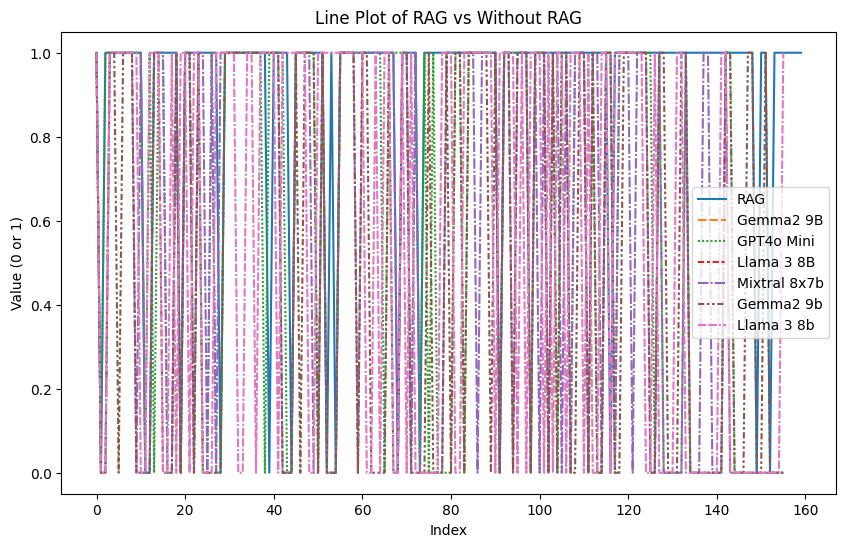

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df)
plt.title('Line Plot of RAG vs Without RAG')
plt.xlabel('Index')
plt.ylabel('Value (0 or 1)')
plt.show()

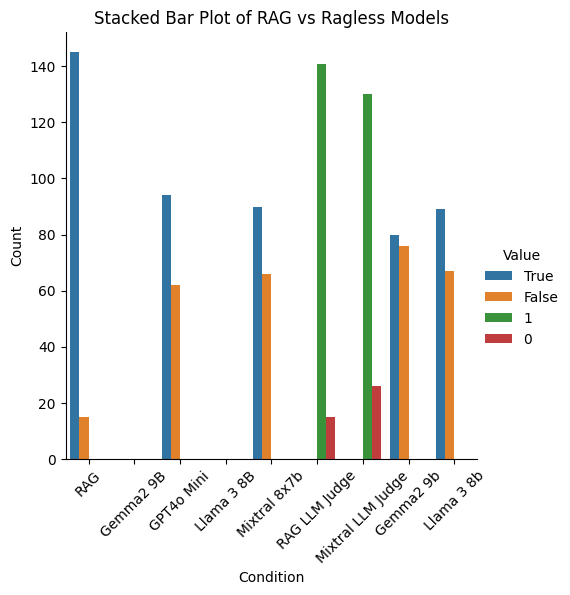

In [8]:
df_melted = pd.melt(df, var_name='Condition', value_name='Value')
sns.catplot(x='Condition', hue='Value', kind='count', data=df_melted)
plt.title('Stacked Bar Plot of RAG vs Ragless Models')
plt.xlabel('Condition')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [9]:
rag_accuracy = df['RAG'].mean()
gemma_accuracy = df['Gemma2 9b'].mean()
gpt4o_accuracy = df['GPT4o Mini'].mean()
llama_accuracy = df['Llama 3 8b'].mean()
mixtral_accuracy = df['Mixtral 8x7b'].mean()

print(f'RAG Accuracy: {rag_accuracy:.2f}')
print(f'Gemma2 9b Accuracy: {gemma_accuracy:.2f}')
print(f'GPT4o Mini Accuracy: {gpt4o_accuracy:.2f}')
print(f'Llama 3 8b Accuracy: {llama_accuracy:.2f}')
print(f'Mixtral 8x7b Accuracy: {mixtral_accuracy:.2f}')


RAG Accuracy: 0.91
Gemma2 9b Accuracy: 0.51
GPT4o Mini Accuracy: 0.60
Llama 3 8b Accuracy: 0.57
Mixtral 8x7b Accuracy: 0.58


In [18]:
# Combine each dataframe into a single dataframe, separated by name
combined_df = pd.concat([
    df_rag.assign(Model='RAG'),
    df_gemma2.assign(Model='Gemma2 9B'),
    df_gpt4o.assign(Model='GPT4o Mini'),
    df_llama3.assign(Model='Llama 3 8B'),
    df_mixtral.assign(Model='Mixtral 8x7b'),
    df_ragllmjudge.assign(Model='RAG LLM Judge'),
    df_mixtralllmjudge.assign(Model='Mixtral LLM Judge')
], ignore_index=True)


array(['what kind of government was chiang kai-shek trying to build in china',
       'stock dow highest', 'what is the color code for a rainbow',
       'average time for va claim to be processed',
       'bible names meaning jeremy', 'what was the inqisitions all about',
       'cost to install vinyl soffit per foot',
       'what does the name cull mean', 'what format does virtual dj',
       'normal high temperatures des moines iowa',
       'how much does a police officer make in charleston, illinois',
       'What was the population Jacksonville city as of 2010?',
       'What nationality is Hoesung Lee?',
       'More in the present prevalence of civil disobedience has turned and said to be?',
       'Who noted the different current uses of civil disobedience?',
       'president adams', 'what is an overactive pancreas',
       'how much money does a athletic trainer trainer get a year',
       'how long before rigor sets in', 'who is gal rimon gameffective',
       'what can yo

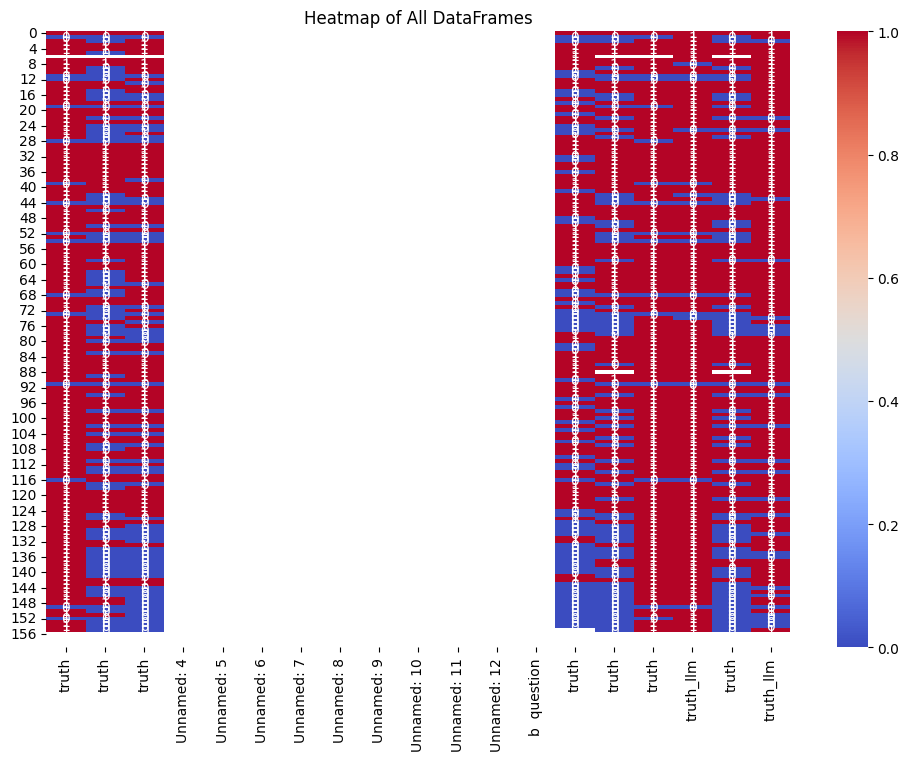

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['With RAG', 'Without RAG'], y=[accuracy_with_rag, accuracy_without_rag])
plt.title('Comparison of QA Accuracy With and Without RAG')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate([accuracy_with_rag, accuracy_without_rag]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()

NameError: name 'accuracy_with_rag' is not defined

<Figure size 1000x600 with 0 Axes>

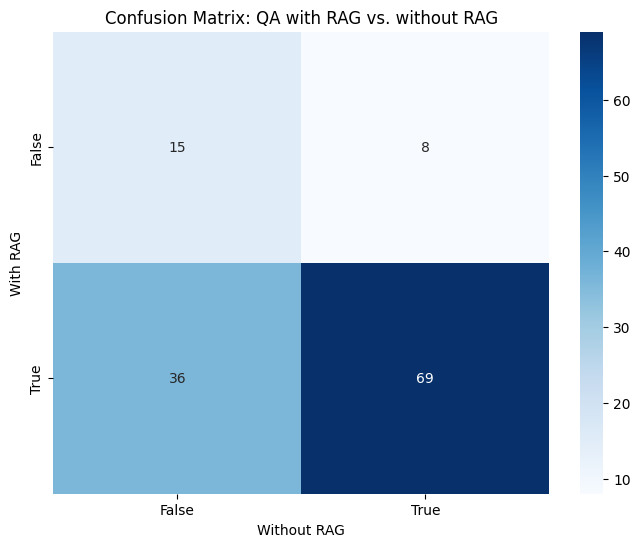

In [36]:
confusion_matrix = pd.crosstab(df['rag_truth'], df['base_truth'], 
                               rownames=['With RAG'], colnames=['Without RAG'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: QA with RAG vs. without RAG')
plt.show()

- Agreement: In total, 84 instances (15 + 69) where both methods agreed (either both correct or both incorrect)
- Disagreement: 44 instances (8 + 36) where the methods disagreed
- RAG improvement: In 36 cases, RAG corrected errors made by the non-RAG method
- RAG regression: In 8 cases, RAG made mistakes where the non-RAG method was correct


In [44]:
(0.82-0.6 )/ 0.6 * 100

36.666666666666664